# PCA
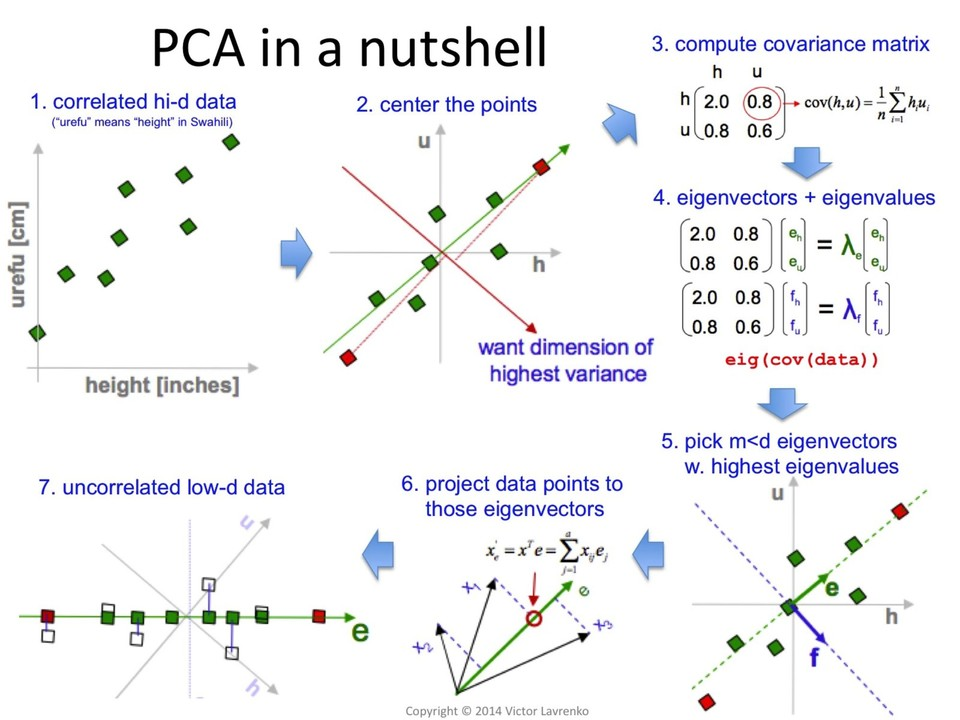

# Overview
Principal Component Analysis (PCA) is a unsupervised machine learning technique used for dimensionality reduction. It is a statistical approach that aims to reduce the number of variables while retaining the maximum amount of information.

The basic idea behind PCA is to find a set of new variables, known as principal components, that can explain the maximum variance in the original data. These principal components are a linear combination of the original variables and are orthogonal to each other. The first principal component has the highest variance, followed by the second, and so on.

# Advantage
1. Reduces the dimensionality of the data, making it easier to visualize and analyze.
2. Can be used to identify the most significant variables in the data.

# Disadvantage

1. Assumes that the data is linearly related, which may not be the case in some situations.
2. The results of PCA can be difficult to interpret, especially when dealing with a large number of variables.
3. May lead to a loss of information, as the principal components only capture the most significant variation in the data.

# Data
The Palmer penguins dataset is a collection of data on three different species of penguins, namely Adelie, Chinstrap, and Gentoo, collected on three islands in the Palmer Archipelago, Antarctica. The dataset contains various physical measurements of penguins, including culmen length, culmen depth, flipper length, and body mass, as well as information on the sex and age of each penguin.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In this analysis, we will explore the relationship between two key features of 2 categories of penguins, Adelie and Gentoo, as well as their bill length, bill depth and flipper length, and how these features can be used to differentiate between penguins.

In [2]:
sns.set_theme() 
df = pd.read_csv("palmer_penguins.csv")
df = df.dropna()
df = df[df["species"].isin(["Adelie", "Gentoo"])]
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].to_numpy()
y = df.species.to_numpy()

We create a python class for our PCA model. The model works by:

1. Standardize the data: Before performing PCA, it is essential to standardize the data by subtracting the mean and dividing by the standard deviation. This step ensures that all variables are on the same scale and have equal weightage.

2. Compute the covariance matrix: The covariance matrix is computed from the standardized data. It represents the relationship between the different variables.

3. Compute the eigenvectors and eigenvalues: Eigenvectors are the direction vectors that are used to transform the data. Eigenvalues represent the amount of variance explained by each principal component.

4. Select the number of principal components: The number of principal components to select is determined by the amount of variance explained by each component. A common rule of thumb is to select the number of components that explain at least 80% of the variance.

5. Transform the data: The data is transformed using the selected principal components.

In [3]:
class PCA(object):
    def __init__(self, X):
        # Scale data
        self.A = X - X.mean(axis = 0)
        self.U, self.S, self.V = np.linalg.svd(self.A, full_matrices=False)
        
    def findAllPCA(self):
        n_features = np.shape(self.A)[1] 
        pc = []
        for i in range(n_features):
            pc.append(self.V.T[:, i])
        return pc
    
    def cluster(self):
        W = self.V.T[:, :2]
        project_X = self.A.dot(W)
        pc1 = project_X[:, 0]
        pc2 = project_X[:, 1]
        return [pc1, pc2]
    
    def variance_explained(self):
        eigenvalues = (self.S ** 2) / (self.A.shape[0] - 1)
        variance_explained = eigenvalues / np.sum(eigenvalues)
        return variance_explained


We create an instance of the PCA class and find all of its PCA.

In [4]:
pca = PCA(X)
all_pc = pca.findAllPCA()
# Print all pca
for i in range(1, len(all_pc)+1):
    print("PC" + str(i) + ":" + str(all_pc[i-1]))

PC1:[ 0.29544785 -0.08151626  0.95187482]
PC2:[-0.9545478  -0.06623486  0.29060531]
PC3:[ 0.03935824 -0.99446872 -0.09738011]


For our PC1, we see that our third features, flipper lengths accounts for the most variations in our data. Next we cluster our data and project them.

[Text(0.5, 0, 'First Principle Component'),
 Text(0, 0.5, 'Second Principle Component')]

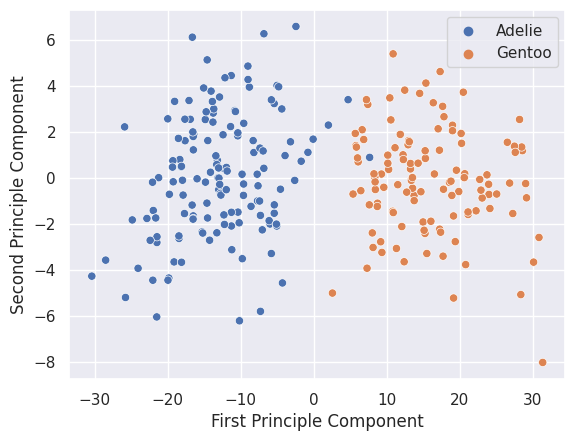

In [5]:
[pc1, pc2] = pca.cluster()
sns.scatterplot(x=pc1, y=pc2, hue=y).set(xlabel='First Principle Component', 
                                         ylabel='Second Principle Component')

The Adelie and Gentoo classes are very well separated by our PCA model. We can also check on how much our PC components account for the variations.

<Axes: xlabel='PC', ylabel='Variance explained'>

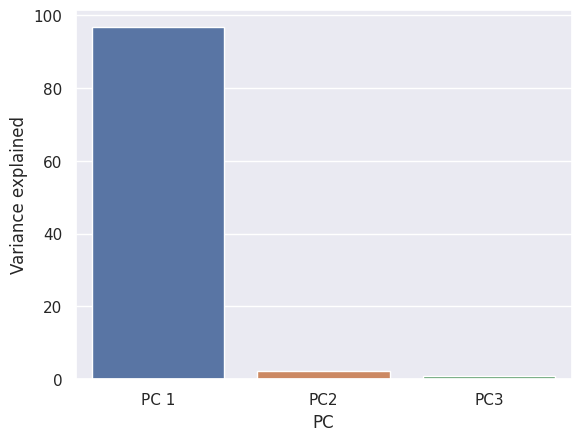

In [6]:
variance_explained = pca.variance_explained()
variance_explained = variance_explained * 100
pc_name = ["PC 1", "PC2", "PC3"]
pc_df = pd.DataFrame({'PC': pc_name,
                      'Variance explained': variance_explained})
sns.barplot(x = 'PC', y = 'Variance explained', data = pc_df)

# Conclusion
As expected, our PC 1 account the most variations. A high PC1 is desirable because PC1 is a linear combination of all the original features, and the coefficients in the combination provide information about the relative importance of each feature in explaining the variance of the data. By analyzing the coefficients of PC1, we can identify the most important features that contribute the most to the variations in the data.